In [1]:
import numpy as np
import csv
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as Data
import torchvision

In [2]:
from sklearn.model_selection import train_test_split
 #首先，读取.CSV文件成矩阵的形式。
my_matrix = np.loadtxt(open("results.csv"),delimiter=",",skiprows=0)
#print(my_matrix)
new_data1 = np.loadtxt(open("data_Acinetobacter baumannii.csv"),delimiter=",",skiprows=0)
new_data2 = np.loadtxt(open("data_Pseudomonas nitritireducens-AOB20.csv"),delimiter=",",skiprows=0)

my_matrix = np.vstack((my_matrix,new_data1))
my_matrix = np.vstack((my_matrix,new_data2))

print(my_matrix)
#for n in new_data1:
#    my_matrix.append(n)
#for n in new_data2:
#    my_matrix.append(n)
#对于矩阵而言，将矩阵倒数第一列之前的数值给了X（输入数据），将矩阵大最后一列的数值给了y（标签）
X, y = my_matrix[:,:-1],my_matrix[:,-1]

#X = np.load('X_2019clinical.npy')
#y = np.load('y_2019clinical.npy')


[[0.04851095 0.04255719 0.02830206 ... 0.01893853 0.01285502 0.        ]
 [0.02931929 0.03494327 0.03729978 ... 0.03034649 0.02700186 0.        ]
 [0.05283095 0.03790662 0.02872379 ... 0.05526551 0.05592461 0.        ]
 ...
 [0.26273887 0.24134372 0.2082449  ... 0.14596688 0.13957147 9.        ]
 [0.27132432 0.22532877 0.16928747 ... 0.15333333 0.13951453 9.        ]
 [0.23553421 0.26732525 0.31013608 ... 0.1854257  0.24184243 9.        ]]


In [3]:
#yy = np.load('y_reference.npy')
#len(yy)
#print(new_y)

In [4]:
#print(y_train)
label = y 
#print(y_train)
sx_1 = 1
sx_2 =(sx_1*0.99*0.27*0.99)
sx_8 = sx_1*0.99*0.27*0.25*0.99
sx_7 = sx_1*0.99*0.27*0.25*1
sx_6 = sx_1*0.99*0.31*0.99
sx_3 = sx_1*0.99*0.31*0.34
sx_4 = sx_1*0.99*0.31*0.51*0.47*0.88*0.78
sx_5 = sx_1*0.99*0.31*0.51*0.47*0.88*0.78*0.78
sx_9 = sx_1*1.00*0.95*0.99*0.95
sx_10 = sx_1*0.99
print(sx_6)
y = [sx_2 if i == 1 else i for i in y]
y = [sx_8 if i == 7 else i for i in y]
y = [1 if i == 0 else i for i in y]
y = [sx_3 if i == 2 else i for i in y]
y = [sx_4 if i == 3 else i for i in y]
y = [sx_5 if i == 4 else i for i in y]
y = [sx_6 if i == 5 else i for i in y]
y = [sx_7 if i == 6 else i for i in y]
y = [sx_9 if i == 8 else i for i in y]
y = [sx_10 if i == 9 else i for i in y]

#y_train = np.array(y_train)
print(y)

0.303831
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.2646270000000

In [5]:
X_train =[]
X_test =[]
#X_test1 =[]

y_train =[]
y_test =[]

for n in range(len(y)):
    if y[n] == sx_1:
        X_test.append(X[n])
        y_test.append(y[n])

for n in range(len(y)):
    if y[n] == sx_2 or y[n] == sx_5 or y[n] == sx_7 or y[n] == sx_9 :
        X_test.append(X[n])
        y_test.append(y[n])
    else:
        X_train.append(X[n])
        y_train.append(y[n])
print(y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.2

In [6]:
 #利用train_test_split方法，将X,y随机划分问，训练集（X_train），训练集标签（X_test），测试卷（y_train），
 #测试集标签（y_test），安训练集：测试集=7:3的
 #概率划分，到此步骤，可以直接对数据进行处理
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
 #此步骤，是为了将训练集与数据集的数据分别保存为CSV文件
 #np.column_stack将两个矩阵进行组合连接
#train= np.column_stack((X_train,y_train))
 #numpy.savetxt 将txt文件保存为.csv结尾的文件
#np.savetxt('train_usual.csv',train, delimiter = ',')
#test = np.column_stack((X_test, y_test))
#np.savetxt('test_usual.csv', test, delimiter = ',')

In [7]:
#print(y_train)
label = y_train
#print(label)
y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
#new_X = np.array(new_X)
#new_y = np.array(new_y)

In [8]:
#torch_new_y = torch.from_numpy(new_y)
#torch_new_x = torch.from_numpy(new_X)
torch_x = torch.from_numpy(X_train)
torch_y = torch.from_numpy(y_train)
test_x = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)

#x_test2 = torch.tensor(torch_new_x, dtype=torch.float32)
#y_test2 = torch.tensor(torch_new_y, dtype=torch.float32)
y_train = torch.tensor(torch_y, dtype=torch.float32)
y_test = torch.tensor(test_y,dtype = torch.float32)
x_test = torch.tensor(test_x , dtype=torch.float32)
x_train = torch.tensor(torch_x, dtype=torch.float32)

D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
D:\softwares\Program Files\Python37\

In [9]:
#print(y_test)


In [10]:
#Hyper parameters
EPOCH = 500
BATCH_SIZE = 100
TIME_STEP = 20
INPUT_SIZE = 60
LR = 0.001

In [11]:
#x_test2 = x_test2.reshape(x_test2.shape[0], TIME_STEP, INPUT_SIZE)
x_test = x_test.reshape(x_test.shape[0], TIME_STEP, INPUT_SIZE)
x_train = x_train.reshape(x_train.shape[0], TIME_STEP, INPUT_SIZE)
#print(x_train.shape,x_test.shape)
torch_dataset = Data.TensorDataset(x_train,y_train )
train_loader = Data.DataLoader(dataset= torch_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=2)
#print(x_train,x_test)

In [12]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=3,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 1)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [13]:
class My_loss(nn.Module):
    def __init__(self):
    

    
        super().__init__()
        
    def forward(self , x, y):
        time = 1
        ave = torch.tensor(0)
        for n in range(len(x)):
            if y[n] == 1:
                ave = torch.add(x[n], ave)
                time += 1
        #print(ave,time)
        ave  = torch.div(ave,time) 
        div = torch.div(x,ave)
        loss = torch.mean(torch.pow((div - y),2))
        return loss

In [14]:
#print(len(X_out),len(y))

In [15]:
rnn =  RNN()
print(rnn)
optimizer = torch.optim.Adam(rnn.parameters(), lr = LR)
loss_func = My_loss()

RNN(
  (rnn): LSTM(60, 64, num_layers=3, batch_first=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [16]:
loss_x = []
loss_train = []
loss_tes =[]
#loss_tes2 =[]
for n in range(500):
    loss_x.append(n)
    train_out = rnn(x_train)
    #print(train_out.size())
    
    loss = loss_func(train_out, y_train)
    #print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_train.append(loss.data.item())
    
    test_out = rnn(x_test)
    loss_test = loss_func(test_out,y_test)
    loss_tes.append(loss_test.data.item())
    
    #test_out2 = rnn(x_test2)
    #loss_test2 = loss_func(test_out2,y_test2)
    #loss_tes2.append(loss_test2.data.item())
    print('times:'+str(n)+' train:'+str(loss)+' test:'+ str(loss_test))
    

times:0 train:tensor(0.5111, grad_fn=<MeanBackward0>) test:tensor(0.4358, grad_fn=<MeanBackward0>)
times:1 train:tensor(0.4954, grad_fn=<MeanBackward0>) test:tensor(0.4359, grad_fn=<MeanBackward0>)
times:2 train:tensor(0.4960, grad_fn=<MeanBackward0>) test:tensor(0.4325, grad_fn=<MeanBackward0>)
times:3 train:tensor(0.4920, grad_fn=<MeanBackward0>) test:tensor(0.4333, grad_fn=<MeanBackward0>)
times:4 train:tensor(0.4919, grad_fn=<MeanBackward0>) test:tensor(0.4320, grad_fn=<MeanBackward0>)
times:5 train:tensor(0.4906, grad_fn=<MeanBackward0>) test:tensor(0.4288, grad_fn=<MeanBackward0>)
times:6 train:tensor(0.4882, grad_fn=<MeanBackward0>) test:tensor(0.4254, grad_fn=<MeanBackward0>)
times:7 train:tensor(0.4859, grad_fn=<MeanBackward0>) test:tensor(0.4235, grad_fn=<MeanBackward0>)
times:8 train:tensor(0.4852, grad_fn=<MeanBackward0>) test:tensor(0.4215, grad_fn=<MeanBackward0>)
times:9 train:tensor(0.4837, grad_fn=<MeanBackward0>) test:tensor(0.4193, grad_fn=<MeanBackward0>)
times:10 t

times:163 train:tensor(0.3316, grad_fn=<MeanBackward0>) test:tensor(0.3291, grad_fn=<MeanBackward0>)
times:164 train:tensor(0.3241, grad_fn=<MeanBackward0>) test:tensor(0.3248, grad_fn=<MeanBackward0>)
times:165 train:tensor(0.3168, grad_fn=<MeanBackward0>) test:tensor(0.3208, grad_fn=<MeanBackward0>)
times:166 train:tensor(0.3095, grad_fn=<MeanBackward0>) test:tensor(0.3168, grad_fn=<MeanBackward0>)
times:167 train:tensor(0.3025, grad_fn=<MeanBackward0>) test:tensor(0.3125, grad_fn=<MeanBackward0>)
times:168 train:tensor(0.2960, grad_fn=<MeanBackward0>) test:tensor(0.3075, grad_fn=<MeanBackward0>)
times:169 train:tensor(0.2899, grad_fn=<MeanBackward0>) test:tensor(0.3023, grad_fn=<MeanBackward0>)
times:170 train:tensor(0.2846, grad_fn=<MeanBackward0>) test:tensor(0.2977, grad_fn=<MeanBackward0>)
times:171 train:tensor(0.2802, grad_fn=<MeanBackward0>) test:tensor(0.2947, grad_fn=<MeanBackward0>)
times:172 train:tensor(0.2768, grad_fn=<MeanBackward0>) test:tensor(0.2932, grad_fn=<MeanBa

times:325 train:tensor(0.2474, grad_fn=<MeanBackward0>) test:tensor(0.2460, grad_fn=<MeanBackward0>)
times:326 train:tensor(0.2471, grad_fn=<MeanBackward0>) test:tensor(0.2457, grad_fn=<MeanBackward0>)
times:327 train:tensor(0.2470, grad_fn=<MeanBackward0>) test:tensor(0.2469, grad_fn=<MeanBackward0>)
times:328 train:tensor(0.2471, grad_fn=<MeanBackward0>) test:tensor(0.2450, grad_fn=<MeanBackward0>)
times:329 train:tensor(0.2471, grad_fn=<MeanBackward0>) test:tensor(0.2458, grad_fn=<MeanBackward0>)
times:330 train:tensor(0.2468, grad_fn=<MeanBackward0>) test:tensor(0.2460, grad_fn=<MeanBackward0>)
times:331 train:tensor(0.2468, grad_fn=<MeanBackward0>) test:tensor(0.2446, grad_fn=<MeanBackward0>)
times:332 train:tensor(0.2469, grad_fn=<MeanBackward0>) test:tensor(0.2459, grad_fn=<MeanBackward0>)
times:333 train:tensor(0.2467, grad_fn=<MeanBackward0>) test:tensor(0.2450, grad_fn=<MeanBackward0>)
times:334 train:tensor(0.2466, grad_fn=<MeanBackward0>) test:tensor(0.2447, grad_fn=<MeanBa

times:487 train:tensor(0.2605, grad_fn=<MeanBackward0>) test:tensor(0.2693, grad_fn=<MeanBackward0>)
times:488 train:tensor(0.2587, grad_fn=<MeanBackward0>) test:tensor(0.2700, grad_fn=<MeanBackward0>)
times:489 train:tensor(0.2580, grad_fn=<MeanBackward0>) test:tensor(0.2713, grad_fn=<MeanBackward0>)
times:490 train:tensor(0.2584, grad_fn=<MeanBackward0>) test:tensor(0.2704, grad_fn=<MeanBackward0>)
times:491 train:tensor(0.2586, grad_fn=<MeanBackward0>) test:tensor(0.2664, grad_fn=<MeanBackward0>)
times:492 train:tensor(0.2578, grad_fn=<MeanBackward0>) test:tensor(0.2615, grad_fn=<MeanBackward0>)
times:493 train:tensor(0.2567, grad_fn=<MeanBackward0>) test:tensor(0.2577, grad_fn=<MeanBackward0>)
times:494 train:tensor(0.2562, grad_fn=<MeanBackward0>) test:tensor(0.2557, grad_fn=<MeanBackward0>)
times:495 train:tensor(0.2562, grad_fn=<MeanBackward0>) test:tensor(0.2551, grad_fn=<MeanBackward0>)
times:496 train:tensor(0.2562, grad_fn=<MeanBackward0>) test:tensor(0.2553, grad_fn=<MeanBa

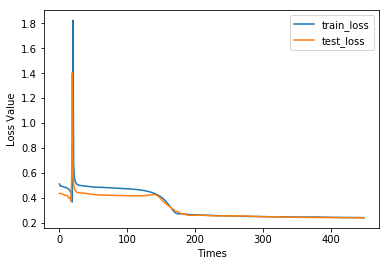

In [18]:
plt.xlabel('Times')
plt.ylabel('Loss Value')
plt.plot(loss_x[:450],loss_train[:450],label = 'train_loss')
plt.plot(loss_x[:450],loss_tes[:450],label = 'test_loss')
plt.legend()
plt.savefig('Analysis_loss_new.tif', dpi = 400)
plt.show()

In [19]:
average = np.loadtxt(open("average.csv"),delimiter=",",skiprows=0)
average

array([0.05070995, 0.04952454, 0.04884437, ..., 0.02296055, 0.02446511,
       0.02585766])

In [23]:
my_matrix = np.loadtxt(open("results.csv"),delimiter=",",skiprows=0)
#print(my_matrix)
 #对于矩阵而言，将矩阵倒数第一列之前的数值给了X（输入数据），将矩阵大最后一列的数值给了y（标签）
X, y = my_matrix[:,:-1],my_matrix[:,-1]
torch_y = torch.from_numpy(y)
y_input = torch.tensor(torch_y , dtype=torch.float32)
X_loss = []
axis = []
for n in range(40):
    #X_minloss = 0
    #print('start'+ str(X_minloss))
    axis.append(n)
    for i in range(30):
        for j in range(len(X)):
            X[j][n*30+i] = average[n*30+i]
    
            
    torch_X = torch.from_numpy(X)
    X_input = torch.tensor(torch_X , dtype=torch.float32)
    X_input = X_input.reshape(X_input.shape[0], TIME_STEP, INPUT_SIZE)
    loss_func = My_loss()
    
    X_out = rnn(X_input)
    X_minloss = loss_func(X_out,y_input)
    X_minloss = X_minloss.data.item()
    
    #print(X_minloss)
    
    '''
    for m in range(len(X)):
        minloss = out[m].data.item() - X_out[m].data.item()
        minloss = minloss
        X_minloss += minloss
    print('time: '+str(n)+'loss: '+str(X_minloss))
    '''
    X_loss.append(X_minloss)
    
print(X_loss)    
    

D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[12.051810264587402, 12.11715030670166, 11.931812286376953, 11.88532829284668, 11.660590171813965, 11.672466278076172, 11.72838020324707, 11.684107780456543, 11.554776191711426, 11.575398445129395, 11.620412826538086, 11.638528823852539, 11.961516380310059, 11.848822593688965, 11.635305404663086, 11.538260459899902, 11.546085357666016, 11.377203941345215, 11.5841703414917, 11.511459350585938, 11.721763610839844, 11.699141502380371, 11.76040267944336, 11.831377029418945, 11.964370727539062, 11.968463897705078, 12.13801097869873, 12.063545227050781, 11.769883155822754, 11.771486282348633, 11.781393051147461, 11.782004356384277, 11.78712272644043, 11.809717178344727, 11.813232421875, 11.81299114227295, 11.812744140625, 11.812564849853516, 11.811281204223633, 11.811124801635742]


In [24]:
from sklearn import preprocessing

In [25]:
results = preprocessing.scale(X_loss)

[ 1.66448832e+00  2.05200216e+00  9.52813260e-01  6.77129459e-01
 -6.55730622e-01 -5.85296697e-01 -2.53686561e-01 -5.16254143e-01
 -1.28328428e+00 -1.16097936e+00 -8.94011424e-01 -7.86570419e-01
  1.12898008e+00  4.60624182e-01 -8.05687633e-01 -1.38123455e+00
 -1.33482723e+00 -2.33641654e+00 -1.10895565e+00 -1.54018457e+00
 -2.92927754e-01 -4.27093267e-01 -6.37700488e-02  3.57159331e-01
  1.14590843e+00  1.17018390e+00  2.17572108e+00  1.73408516e+00
 -7.54394677e-03  1.96375642e-03  6.07180817e-02  6.43435652e-02
  9.46992124e-02  2.28700702e-01  2.49548646e-01  2.48117683e-01
  2.46652784e-01  2.45589460e-01  2.37976510e-01  2.37048929e-01]


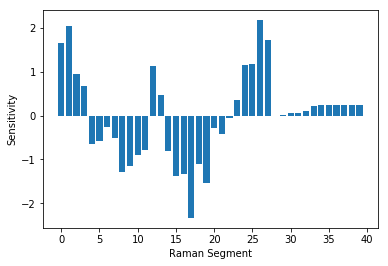

In [26]:
print(results)
axis =[]
for n in range(40):
    axis.append(n)
#print(axis)

plt.xlabel('Raman Segment')
plt.ylabel('Sensitivity')
plt.bar(axis, results)
plt.savefig('Analysis_new.tif', dpi = 400)
plt.show()

